## Import Necessary Functions

These are required to utilize functions specific for data analysis and visualisations.

In [3]:

# For data wrangling 
import numpy as np
import pandas as pd

# For visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

## Read the Data

In [4]:

# Direct link to the CSV file on Google Drive
csv_url = 'https://drive.google.com/uc?id=14HTdhAmJd_U3mJDnwLHPbu6pvh-Yv0vu'

# Read the CSV file from the URL
df = pd.read_csv(csv_url)

df.shape


(10000, 14)

The DataFrame has 1000 rows with 14 attributes. We continue to identify what attributes will be necessary and what data manipulation needs to be carried out before Exploratory analysis and prediction modelling can be done. 


## Initital Exploration

In [5]:
# A quick look
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


The .head(5) pandas function generates a well-structured format of the csv file with the first 5 rows organised.

In [6]:
# What attributes do we have? 
list(df.columns)

['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [7]:

# Description of the data 
print(df.describe()) 

         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

In [8]:
# Check columns list and missing values

df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

No missing values!

In [9]:
# Get unique count for each variable
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

From the above, we will not require the first 2 attributes as these are specific to a customer. For data privacy, we remove the surname as well.

In [10]:
# Drop the columns as explained above
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

The parameter axis = 1 specifies we want to drop these labels from the column. 

We will exclude RowNumber, CustomerId and Surname for reasons explained above.

In [11]:
# Review the top rows of what is left of the data frame
print(df.head(5))
print(df.shape)

   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0  
(10000, 11)


Notice we now have 1000 rows and only 11 attributes. 

In [12]:
# Check variable data types
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

So we mostly have categorical variables and 5 continuous variables.

## Exploratory Data Analysis

Here our main interest is to get an understanding as to how the given attributes relate too the 'Exit' status.



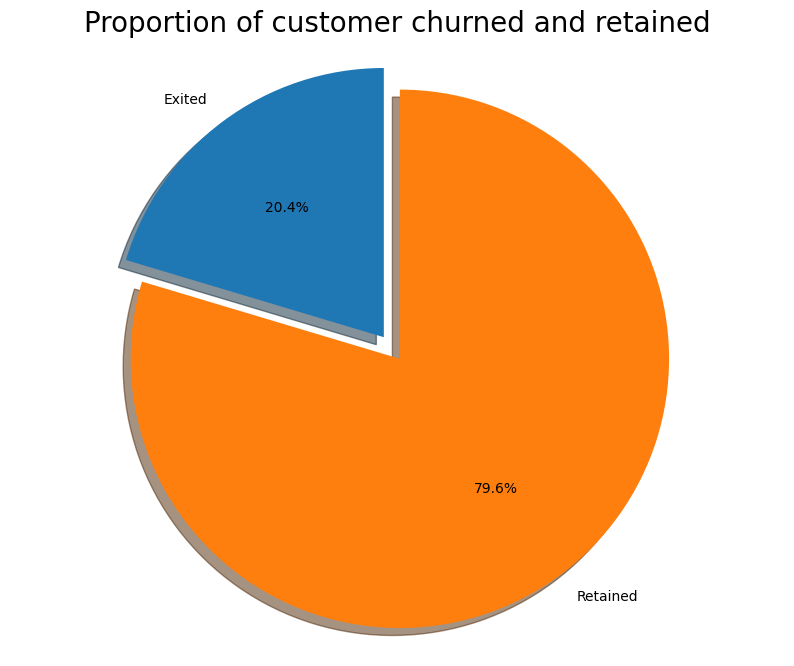

In [13]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited'] ==0].count()]  # count how many customers have left and continued to stay 
explode = (0, 0.1) # this simply offsets a chunk of the pie chart from the centre to emphasise it 
fig1, ax1 = plt.subplots(figsize=(10, 8)) #creates a new figure and a set of subplots, specifying the figure size to be 10 by 8 inches.
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', 
        shadow=True, startangle=90)  #sizes is the data, autopct formats the percentage display on the slices to one decimal place, 
ax1.axis('equal') #This ensures that the pie chart is a perfect circle by setting equal aspect ratio for the axes.
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

So we see 20.4% of the customers have churned (stopped using the bank's services). So for our model we could assume that roughly 20% of customers will churn, as that is the observed rate in the data. The bank will be more interested in the customers that have left as opposed to accurately predicting the customeres who have stayed, so we need to ensure that the chosen model does predict with great accuracy this 20%.  

# We first review Exited vs Churned in relation to the categorical variables

We want to analyse the number of individuals who exited in relation to a categorical variable. For instance, we want to determine how many customers either exited or remained in Germany.

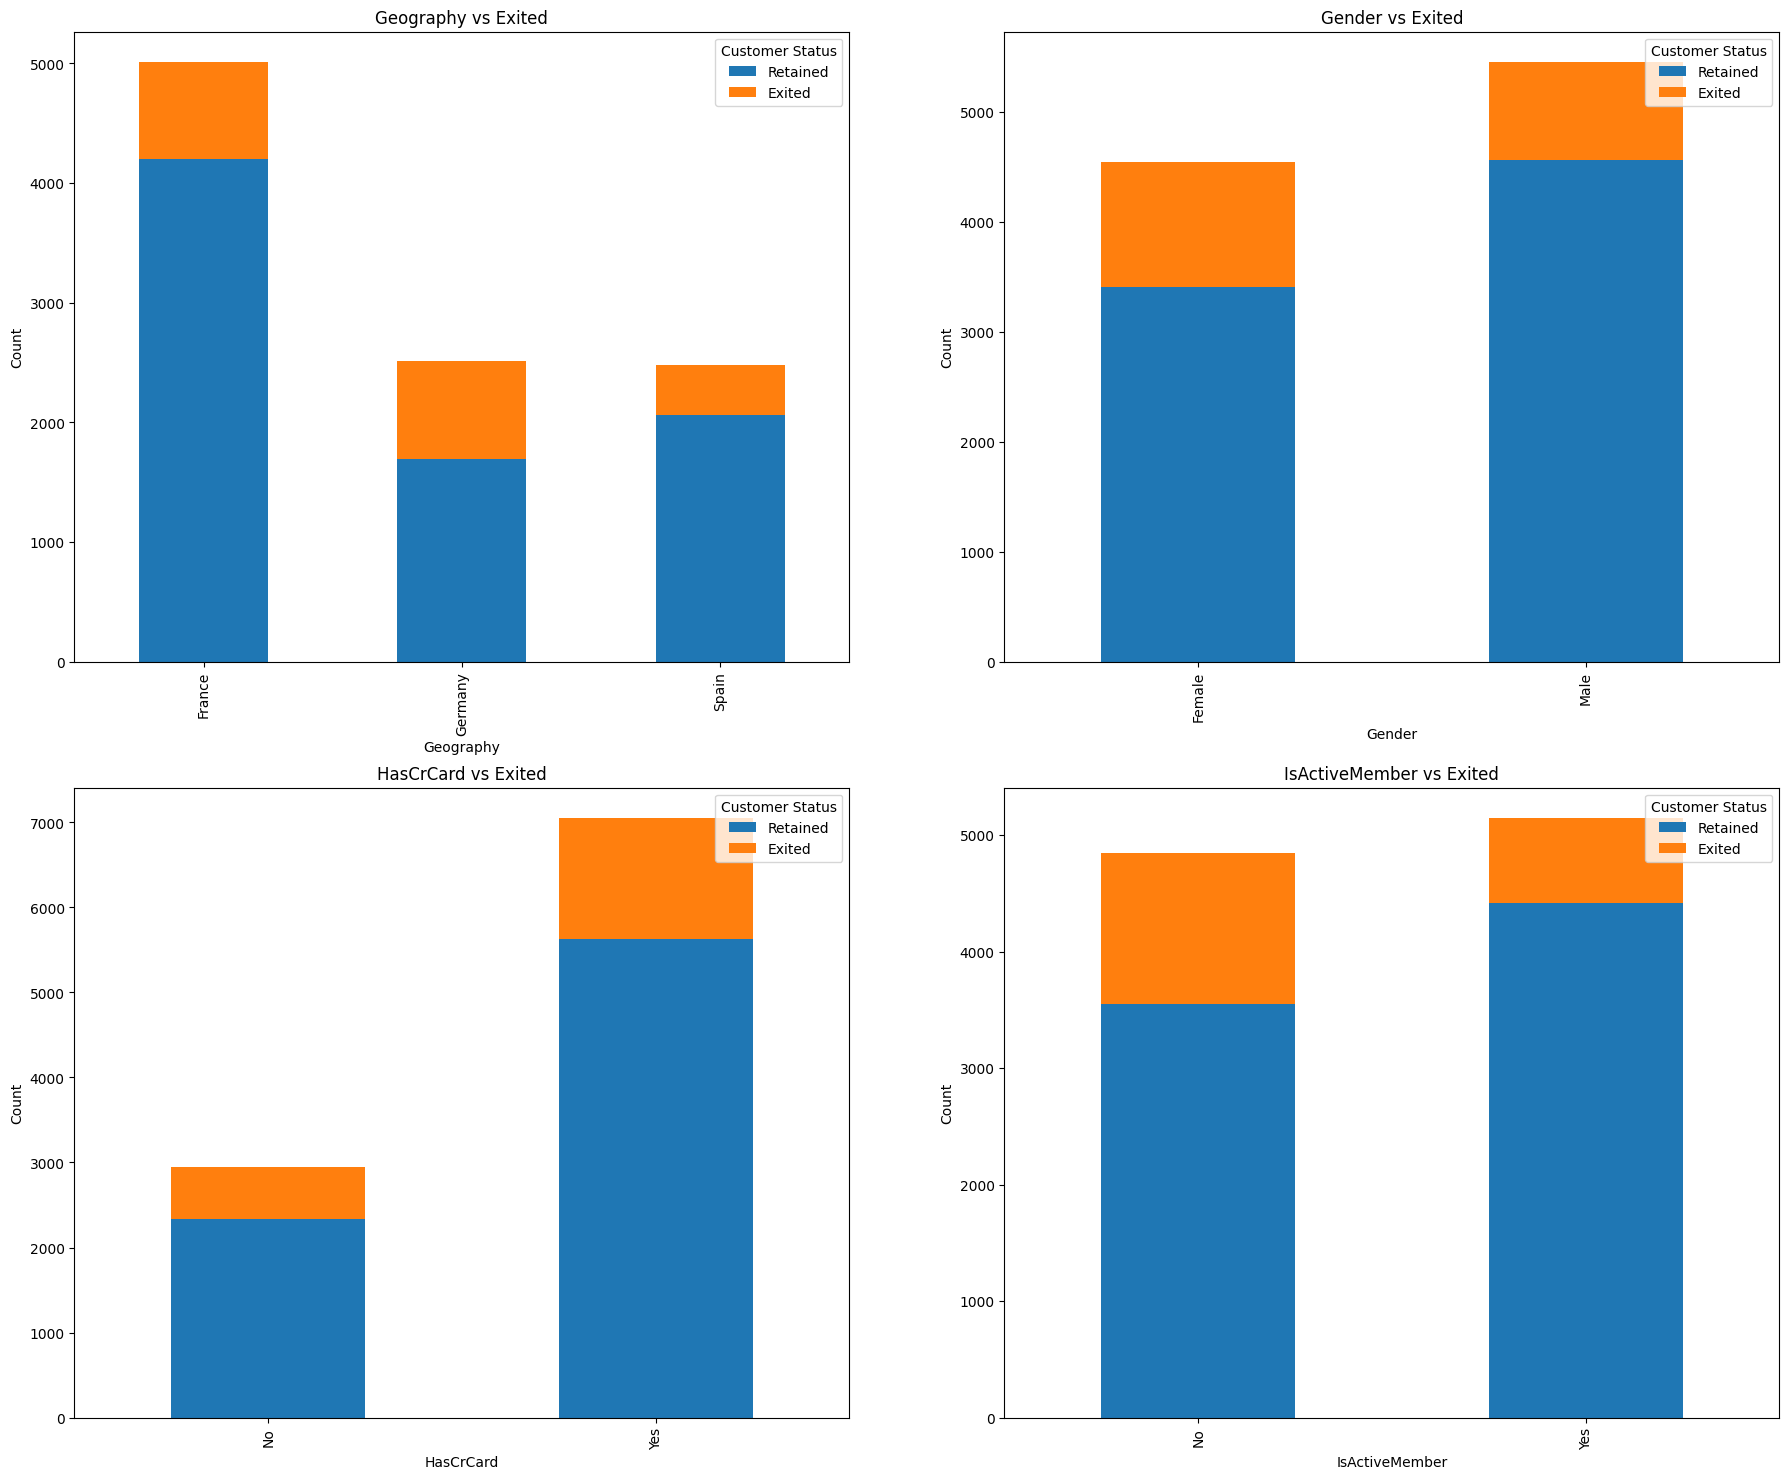

In [14]:

# We count the frequency of each combination of 'Geography' and 'Exited' 
fig, axis = plt.subplots(2, 2, figsize=(22, 18))

# For Geography column
geo_exit_counts = df.groupby(['Geography', 'Exited']).size().unstack()
geo_exit_counts.plot(kind='bar', stacked=True, ax=axis[0, 0])

axis[0,0].set_title('Geography vs Exited')
axis[0,0].set_ylabel('Count')
axis[0,0].set_xlabel('Geography')
axis[0,0].legend(['Retained','Exited'], title = "Customer Status", loc='upper right')

# For gender column
gend_exit_counts = df.groupby(['Gender','Exited']).size().unstack()
gend_exit_counts.plot(kind = 'bar', stacked = True, ax = axis[0,1])

axis[0,1].set_title('Gender vs Exited')
axis[0,1].set_ylabel('Count')
axis[0,1].set_xlabel('Gender')
axis[0,1].legend(['Retained','Exited'], title = "Customer Status", loc='upper right')

# For how many had a credit card
hasCrCard_exit_counts = df.replace({'HasCrCard':{1:'Yes',0:'No'}}).groupby(['HasCrCard','Exited']).size().unstack() #Temporarily changed the values of HasCrCard for ease of understanding visuals
hasCrCard_exit_counts.plot(kind = 'bar', stacked = True, ax = axis[1,0])


axis[1,0].set_title('HasCrCard vs Exited')
axis[1,0].set_ylabel('Count')
axis[1,0].set_xlabel('HasCrCard')
axis[1,0].legend(['Retained','Exited'], title = "Customer Status", loc='upper right')

# For how many are active members
isActiveMember_exit_counts = df.replace({'IsActiveMember':{1:'Yes',0:'No'}}).groupby(['IsActiveMember','Exited']).size().unstack()
isActiveMember_exit_counts.plot(kind = 'bar', stacked = True, ax =axis[1,1])

axis[1,1].set_title('IsActiveMember vs Exited')
axis[1,1].set_ylabel('Count')
axis[1,1].set_xlabel('IsActiveMember')
axis[1,1].legend(['Retained','Exited'], title = "Customer Status", loc='upper right')


fig, axis = plt.subplots(2,2,figsize = (20,12))


# Next we review how the continuous data attributes relates to Exited vs Retained 

Text(0, 0.5, 'EstimatedSalary')

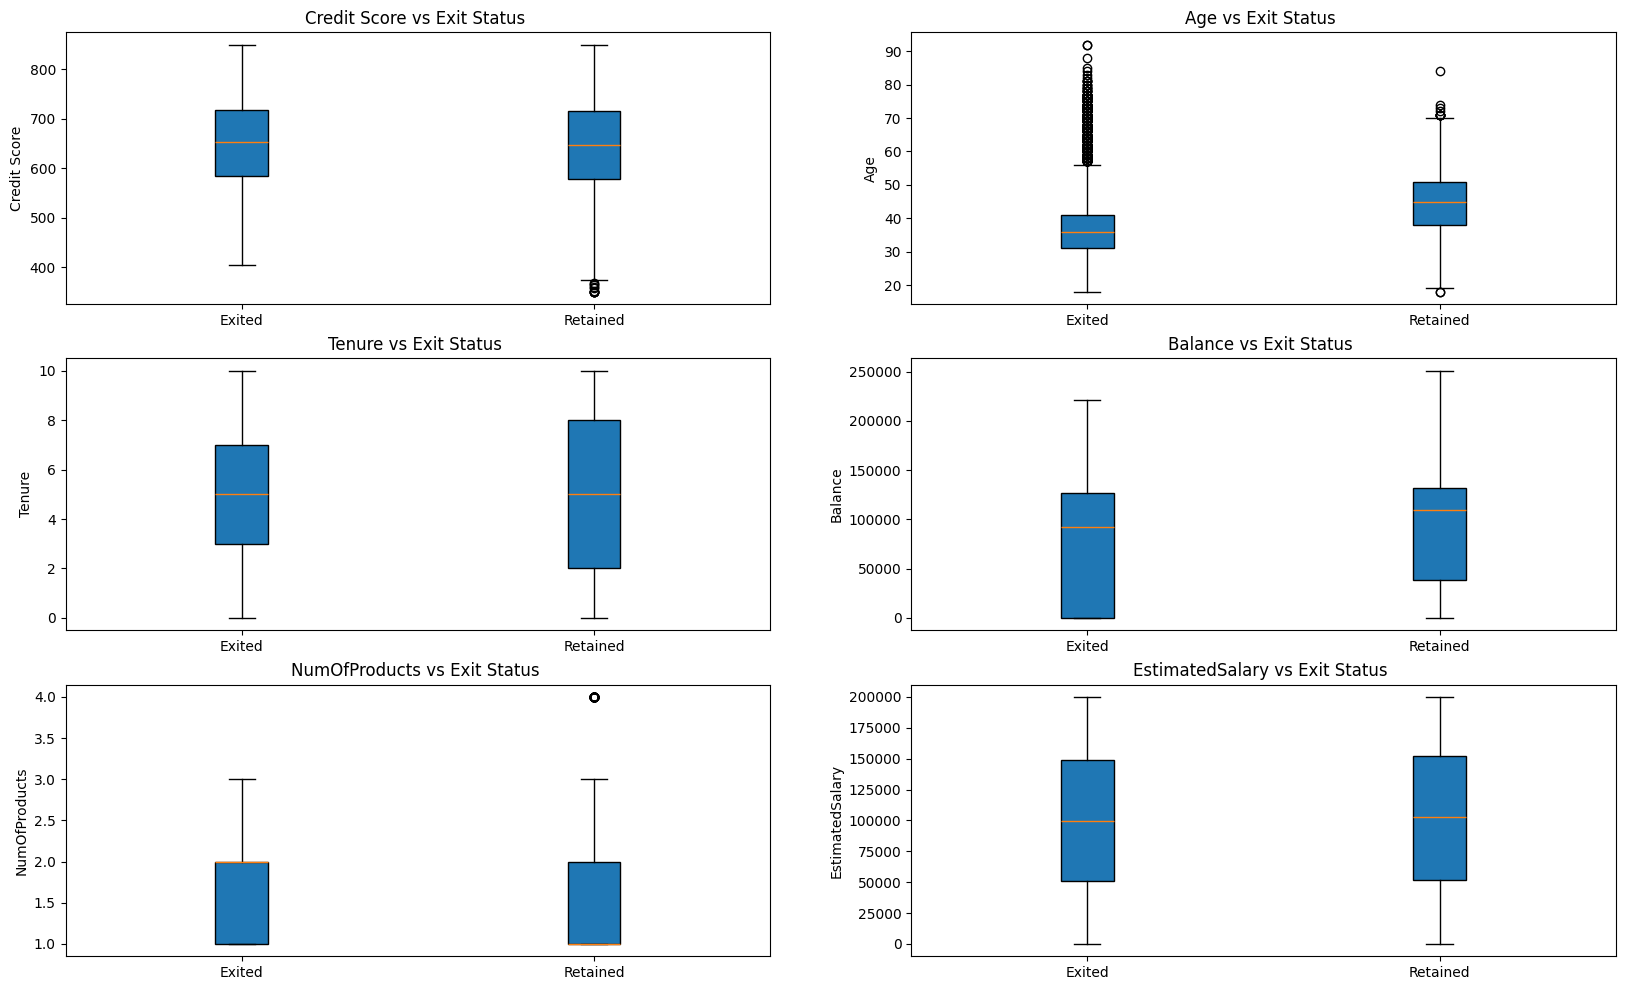

In [25]:
fig, axis = plt.subplots(3, 2, figsize=(20, 12))



axis[0][0].boxplot([df[df['Exited'] == 0]['CreditScore'], df[df['Exited'] == 1]['CreditScore']], 
                    tick_labels=['Exited', 'Retained'], patch_artist=True)
axis[0][0].set_title('Credit Score vs Exit Status ')
axis[0][0].set_ylabel('Credit Score')


axis[0][1].boxplot([df[df['Exited'] == 0]['Age'], df[df['Exited'] == 1]['Age']], 
                    tick_labels=['Exited', 'Retained'], patch_artist=True)
axis[0][1].set_title('Age vs Exit Status ')
axis[0][1].set_ylabel('Age')

axis[1][0].boxplot([df[df['Exited'] == 0]['Tenure'], df[df['Exited'] == 1]['Tenure']], 
                    tick_labels=['Exited', 'Retained'], patch_artist=True)
axis[1][0].set_title('Tenure vs Exit Status ')
axis[1][0].set_ylabel('Tenure')

axis[1][1].boxplot([df[df['Exited'] == 0]['Balance'], df[df['Exited'] == 1]['Balance']], 
                    tick_labels=['Exited', 'Retained'], patch_artist=True)
axis[1][1].set_title('Balance vs Exit Status ')
axis[1][1].set_ylabel('Balance')

axis[2][0].boxplot([df[df['Exited'] == 0]['NumOfProducts'], df[df['Exited'] == 1]['NumOfProducts']], 
                    tick_labels=['Exited', 'Retained'], patch_artist=True)
axis[2][0].set_title('NumOfProducts vs Exit Status ')
axis[2][0].set_ylabel('NumOfProducts')

axis[2][1].boxplot([df[df['Exited'] == 0]['EstimatedSalary'], df[df['Exited'] == 1]['EstimatedSalary']], 
                    tick_labels=['Exited', 'Retained'], patch_artist=True)
axis[2][1].set_title('EstimatedSalary vs Exit Status ')
axis[2][1].set_ylabel('EstimatedSalary')



We note the following:
* There is no significant difference in the credit score distribution between retained and churned customers.
* The older customers are churning at more than the younger ones alluding to a difference in service preference in the age categories. The bank may need to review their target market or review the strategy for retention between the different age groups
* With regard to the tenure, the clients on either extreme end (spent little time with the bank or a lot of time with the bank) are more likely to churn compared to those that are of average tenure.
* Worryingly, the bank is losing customers with significant bank balances which is likely to hit their available capital for lending.
* Neither the product nor the salary has a significant effect on the likelihood to churn.

# Feature Engineering
We seek to add features that are likely to have an impact on the probability of churning. We first split the train and test sets

In [26]:
# Split Train, test data
df_train = df.sample(frac=0.8,random_state=200) #randomly sample 80% of the rows from the dataframe
#random_state = 200 ensures the random sampling process is reproducible- we are seeding the 
#random number generator which ensures every time you run the code, the random sampling will pick the same rows
df_test = df.drop(df_train.index) #remove the rows used in training data to construct the testing data 
print(len(df_train))
print(len(df_test))




8000
2000


   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          596   Germany    Male   32       3   96709.07              2   
1          623    France    Male   43       1       0.00              2   
2          601     Spain  Female   44       4       0.00              2   
3          506   Germany    Male   59       8  119152.10              2   
4          560     Spain  Female   27       7  124995.98              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          0               0         41788.37       0  
1          1               1        146379.30       0  
2          1               0         58561.31       0  
3          1               1        170679.74       0  
4          1               1        114669.79       0  
Visualizations for Fold 1


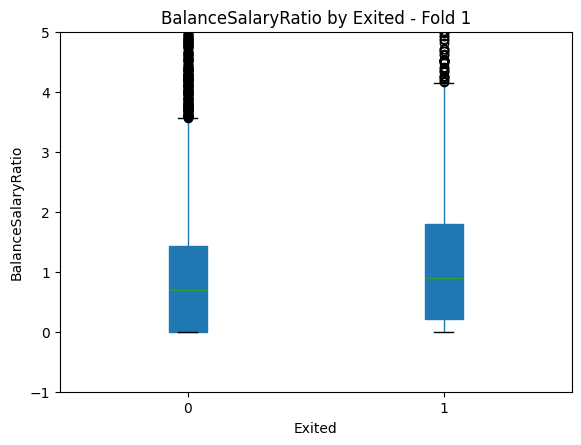

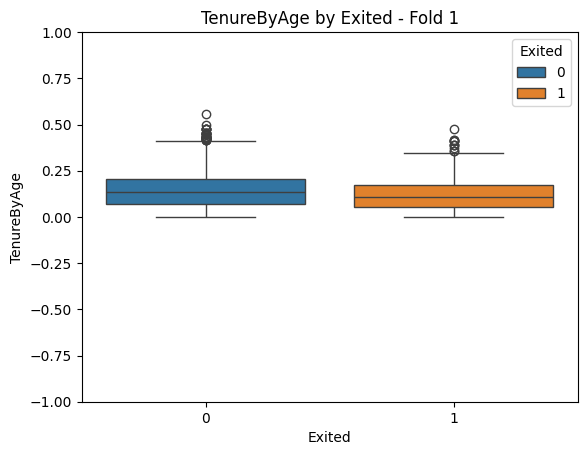

Visualizations for Fold 2


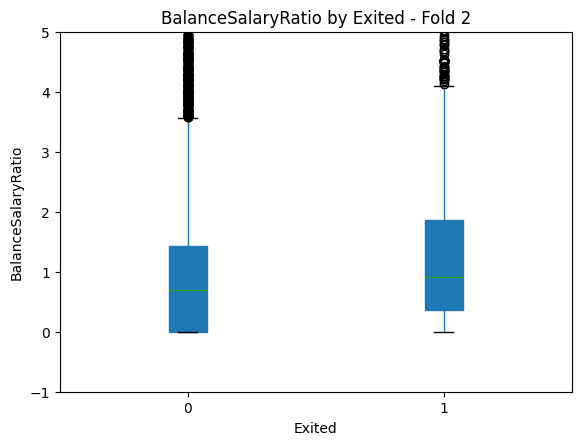

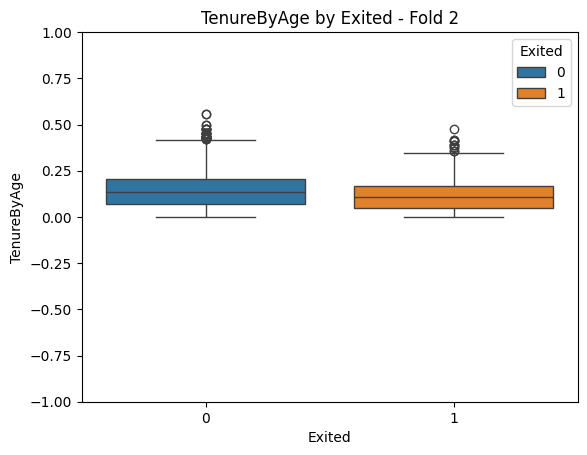

Visualizations for Fold 3


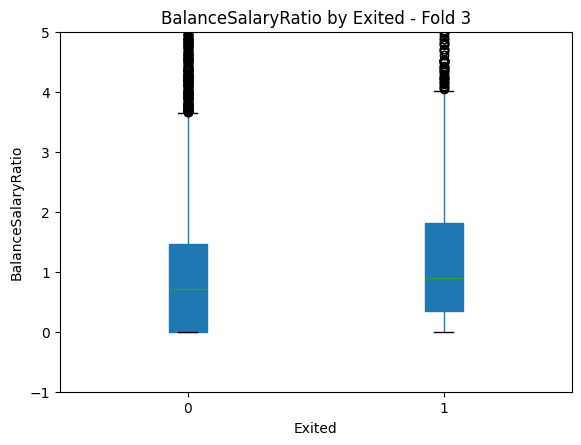

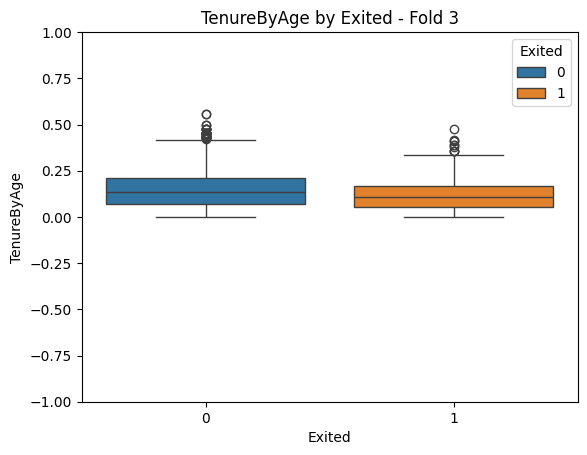

Visualizations for Fold 4


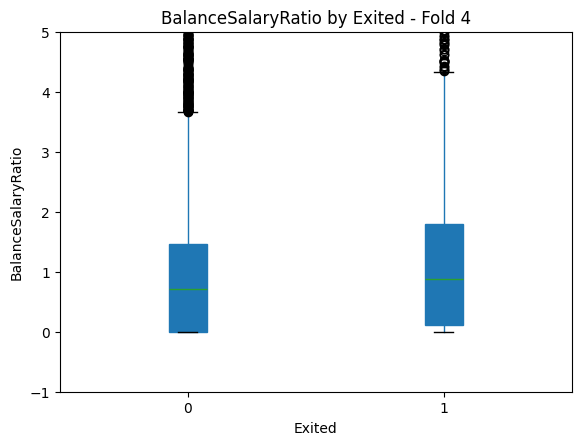

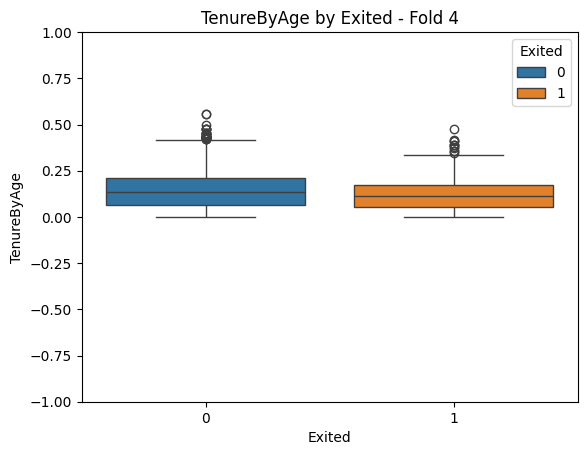

Visualizations for Fold 5


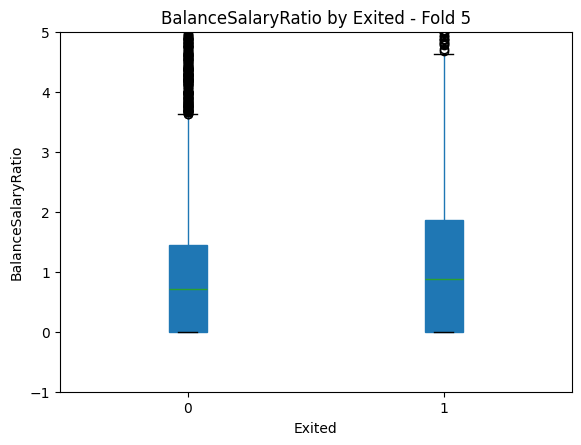

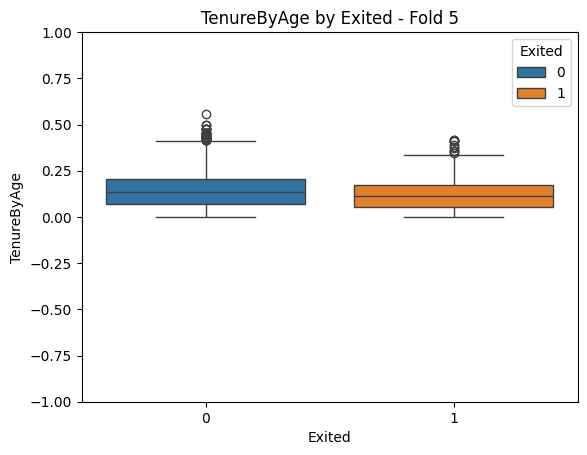

In [51]:
#Let's try test another batch and see if they differ 

# Shuffle the DataFrame
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Print the shuffled DataFrame
print(df_shuffled.head())

k = 5

# Calculate the size of each fold
fold_size = len(df_shuffled) // k

# Split the shuffled dataset into k folds
folds = [df_shuffled.iloc[i*fold_size:(i+1)*fold_size] for i in range(k)]


# Now, for each fold, create the visualizations for the training data (excluding one fold as test)
for i in range(k):
    print(f"Visualizations for Fold {i+1}")
    
    # Combine all other folds to create the training set
    df_train = pd.concat([folds[j] for j in range(k) if j != i], axis=0)

    # Feature engineering: BalanceSalaryRatio and TenureByAge
    df_train['BalanceSalaryRatio'] = df_train['Balance'] / df_train['EstimatedSalary']
    df_train['TenureByAge'] = df_train['Tenure'] / df_train['Age']

    # Visualization 1: Boxplot for BalanceSalaryRatio
    df_train.boxplot(column='BalanceSalaryRatio', by='Exited', patch_artist=True)
    plt.ylim(-1, 5)
    plt.title(f'BalanceSalaryRatio by Exited - Fold {i+1}')
    plt.suptitle('')  # Removes the automatic title
    plt.grid(False)
    plt.xlabel('Exited')
    plt.ylabel('BalanceSalaryRatio')
    plt.show()
    
    # Visualization 2: Boxplot for TenureByAge
    sns.boxplot(y='TenureByAge', x='Exited', hue='Exited', data=df_train)
    plt.ylim(-1, 1)
    plt.title(f'TenureByAge by Exited - Fold {i+1}')
    plt.show()


Text(0, 0.5, 'BalanceSalaryRatio')

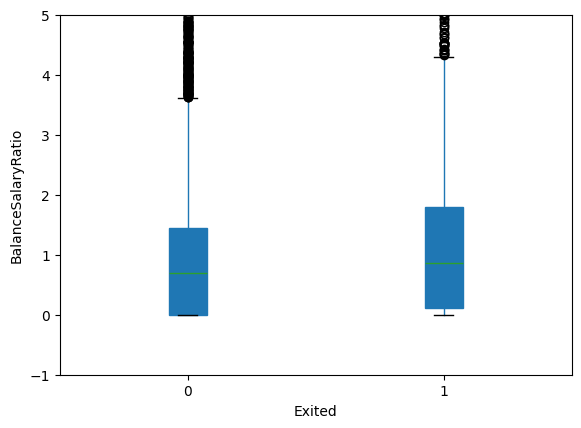

In [39]:
df_train['BalanceSalaryRatio'] = df_train.Balance/df_train.EstimatedSalary


df_train.boxplot(column = 'BalanceSalaryRatio', by = 'Exited', patch_artist=True)
#sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = df_train)
plt.ylim(-1, 5)
plt.title('')
plt.suptitle('')
plt.grid(False)
plt.xlabel('Exited')
plt.ylabel('BalanceSalaryRatio')

we have seen that the salary has little effect on the chance of a customer churning. However as seen above, the ratio of the bank balance and the estimated salary indicates that customers with a higher balance salary ratio churn more which would be worrying to the bank as this impacts their source of loan capital.

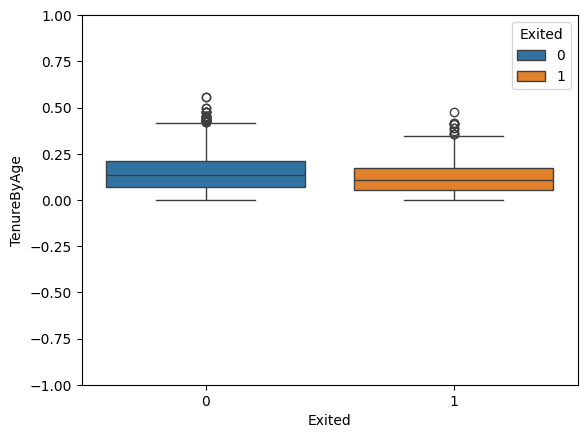

In [40]:
# Given that tenure is a 'function' of age, we introduce a variable aiming to standardize tenure over age:
df_train['TenureByAge'] = df_train.Tenure/(df_train.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = df_train)
plt.ylim(-1, 1)
plt.show()

In [41]:
'''Lastly we introduce a variable to capture credit score given age to take into account credit behaviour visavis adult life
:-)'''
df_train['CreditScoreGivenAge'] = df_train.CreditScore/(df_train.Age)

In [42]:
# Resulting Data Frame
df_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
8159,461,Spain,Female,25,6,0.00,2,1,1,15306.29,0,0.000000,0.240000,18.440000
6332,619,France,Female,35,4,90413.12,1,1,1,20555.21,0,4.398550,0.114286,17.685714
8895,699,France,Female,40,8,122038.34,1,1,0,102085.35,0,1.195454,0.200000,17.475000
5351,558,Germany,Male,41,2,124227.14,1,1,1,111184.67,0,1.117305,0.048780,13.609756
4314,638,France,Male,34,5,133501.36,1,0,1,155643.04,0,0.857741,0.147059,18.764706


#  Data prep for model fitting

In [43]:
# Arrange columns by data type for easier manipulation
continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
cat_vars = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']
df_train = df_train[['Exited'] + continuous_vars + cat_vars]
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,Spain,Female
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,France,Female
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,0,France,Female
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,Germany,Male
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,0,1,France,Male


In [44]:
'''For the one hot variables, we change 0 to -1 so that the models can capture a negative relation 
where the attribute in inapplicable instead of 0'''
df_train.loc[df_train.HasCrCard == 0, 'HasCrCard'] = -1
df_train.loc[df_train.IsActiveMember == 0, 'IsActiveMember'] = -1
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,Spain,Female
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,France,Female
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,-1,France,Female
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,Germany,Male
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,-1,1,France,Male


In [46]:
# One hot encode the categorical variables
# List of categorical variables to one-hot encode
lst = ['Geography', 'Gender']
remove = list()

for i in lst:
    # Check if the column's dtype is object (for categorical strings)
    if df_train[i].dtype == object:
        for j in df_train[i].unique():
            # Create new columns for each unique value in the categorical variable
            df_train[i+'_'+j] = np.where(df_train[i] == j, 1, -1)
        remove.append(i)

# Drop the original categorical columns
df_train = df_train.drop(remove, axis=1)

# Display the first few rows of the updated DataFrame
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,1,-1,-1,1,-1
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,-1,1,-1,1,-1
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,-1,-1,1,-1,1,-1
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,-1,-1,1,-1,1
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,-1,1,-1,1,-1,-1,1


In [47]:
# minMax scaling the continuous variables
minVec = df_train[continuous_vars].min().copy()
maxVec = df_train[continuous_vars].max().copy()
df_train[continuous_vars] = (df_train[continuous_vars]-minVec)/(maxVec-minVec)
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
8159,0,0.222,0.094595,0.6,0.000000,0.333333,0.076118,0.000000,0.432000,0.323157,1,1,1,-1,-1,1,-1
6332,0,0.538,0.229730,0.4,0.360358,0.000000,0.102376,0.003317,0.205714,0.305211,1,1,-1,1,-1,1,-1
8895,0,0.698,0.297297,0.8,0.486406,0.000000,0.510225,0.000901,0.360000,0.300198,1,-1,-1,1,-1,1,-1
5351,0,0.416,0.310811,0.2,0.495130,0.000000,0.555744,0.000843,0.087805,0.208238,1,1,-1,-1,1,-1,1
4314,0,0.576,0.216216,0.5,0.532094,0.000000,0.778145,0.000647,0.264706,0.330882,-1,1,-1,1,-1,-1,1


In [48]:
# data prep pipeline for test data
def DfPrepPipeline(df_predict,df_train_Cols,minVec,maxVec):
    # Add new features
    df_predict['BalanceSalaryRatio'] = df_predict.Balance/df_predict.EstimatedSalary
    df_predict['TenureByAge'] = df_predict.Tenure/(df_predict.Age - 18)
    df_predict['CreditScoreGivenAge'] = df_predict.CreditScore/(df_predict.Age - 18)
    # Reorder the columns
    continuous_vars = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
    cat_vars = ['HasCrCard','IsActiveMember',"Geography", "Gender"] 
    df_predict = df_predict[['Exited'] + continuous_vars + cat_vars]
    # Change the 0 in categorical variables to -1
    df_predict.loc[df_predict.HasCrCard == 0, 'HasCrCard'] = -1
    df_predict.loc[df_predict.IsActiveMember == 0, 'IsActiveMember'] = -1
    # One hot encode the categorical variables
    lst = ["Geography", "Gender"]
    remove = list()
    for i in lst:
        for j in df_predict[i].unique():
            df_predict[i+'_'+j] = np.where(df_predict[i] == j,1,-1)
        remove.append(i)
    df_predict = df_predict.drop(remove, axis=1)
    # Ensure that all one hot encoded variables that appear in the train data appear in the subsequent data
    L = list(set(df_train_Cols) - set(df_predict.columns))
    for l in L:
        df_predict[str(l)] = -1        
    # MinMax scaling coontinuous variables based on min and max from the train data
    df_predict[continuous_vars] = (df_predict[continuous_vars]-minVec)/(maxVec-minVec)
    # Ensure that The variables are ordered in the same way as was ordered in the train set
    df_predict = df_predict[df_train_Cols]
    return df_predict

# Model fitting and selection
For the model fitting, I will try out the following

* Logistic regression in the primal space and with different kernels
* SVM in the primal and with different Kernels
* Ensemble models

ModuleNotFoundError: No module named 'sklearn'